<a href="https://colab.research.google.com/github/ali3nnn/MasterArtificialIntelligence/blob/master/AN1_SEM2_NLP_Laborator_3_POS_%26_Syntax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [300]:
!pip install nltk
!pip install wikipedia
!pip install pandas

     |████████████████████████████████| 10.0MB 5.5MB/s 


In [0]:
from nltk.tag.stanford import StanfordPOSTagger
import nltk
import wikipedia
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import numpy as np
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()
from nltk.corpus import wordnet
from nltk.tokenize import RegexpTokenizer
import sys
from collections import Counter
import pandas

# Exercitiul 1.1


In [0]:
ny = wikipedia.page("New York City")

In [195]:
print("Title:",ny.title)
first200w = word_tokenize(ny.content)[:200]
print("First 200 words:", first200w)

Title: New York City
First 200 words: ['New', 'York', 'City', '(', 'NYC', ')', ',', 'often', 'called', 'the', 'City', 'of', 'New', 'York', 'or', 'simply', 'New', 'York', '(', 'NY', ')', ',', 'is', 'the', 'most', 'populous', 'city', 'in', 'the', 'United', 'States', '.', 'With', 'an', 'estimated', '2018', 'population', 'of', '8,398,748', 'distributed', 'over', 'about', '302.6', 'square', 'miles', '(', '784', 'km2', ')', ',', 'New', 'York', 'is', 'also', 'the', 'most', 'densely', 'populated', 'major', 'city', 'in', 'the', 'United', 'States', '.', 'Located', 'at', 'the', 'southern', 'tip', 'of', 'the', 'U.S.', 'state', 'of', 'New', 'York', ',', 'the', 'city', 'is', 'the', 'center', 'of', 'the', 'New', 'York', 'metropolitan', 'area', ',', 'the', 'largest', 'metropolitan', 'area', 'in', 'the', 'world', 'by', 'urban', 'landmass', '.', 'With', 'almost', '20', 'million', 'people', 'in', 'its', 'metropolitan', 'statistical', 'area', 'and', 'approximately', '23', 'million', 'in', 'its', 'combined

In [0]:
first200s = sent_tokenize(ny.content)[:200]

In [0]:
tagger=StanfordPOSTagger('stanford-postagger-2018-10-16/models/english-bidirectional-distsim.tagger', 'stanford-postagger-2018-10-16/stanford-postagger.jar')

In [198]:
counter = 0
pos_list = []
for sentence in first200s[:20]:
  counter += 1
  pos_list.append(tagger.tag(sentence.split()))
  print(counter, pos_list[-1])
  print()

1 [('New', 'NNP'), ('York', 'NNP'), ('City', 'NNP'), ('(NYC),', 'NNP'), ('often', 'RB'), ('called', 'VBD'), ('the', 'DT'), ('City', 'NNP'), ('of', 'IN'), ('New', 'NNP'), ('York', 'NNP'), ('or', 'CC'), ('simply', 'RB'), ('New', 'NNP'), ('York', 'NNP'), ('(NY),', 'NNP'), ('is', 'VBZ'), ('the', 'DT'), ('most', 'RBS'), ('populous', 'JJ'), ('city', 'NN'), ('in', 'IN'), ('the', 'DT'), ('United', 'NNP'), ('States.', 'NNP')]

2 [('With', 'IN'), ('an', 'DT'), ('estimated', 'VBN'), ('2018', 'CD'), ('population', 'NN'), ('of', 'IN'), ('8,398,748', 'CD'), ('distributed', 'VBN'), ('over', 'RP'), ('about', 'IN'), ('302.6', 'CD'), ('square', 'JJ'), ('miles', 'NNS'), ('(784', 'FW'), ('km2),', 'FW'), ('New', 'NNP'), ('York', 'NNP'), ('is', 'VBZ'), ('also', 'RB'), ('the', 'DT'), ('most', 'RBS'), ('densely', 'RB'), ('populated', 'JJ'), ('major', 'JJ'), ('city', 'NN'), ('in', 'IN'), ('the', 'DT'), ('United', 'NNP'), ('States.', 'NNP')]

3 [('Located', 'VBN'), ('at', 'IN'), ('the', 'DT'), ('southern', 'JJ'

# Exercitiul 1.2
If I would use the single_pos_to_words() function in order to construct the multi_pos_to_words() function it would parse the same article multiple times looking individually for each pos as it does in the single_pos_to_words()

In [0]:
article = wikipedia.page('New York City')

In [0]:
def single_pos_to_words(pos, article):
  #pos -  needs to be a single pos
  #article - needs to be an wikipedia.page('title') object
  all_sentences = sent_tokenize(article.content)[:20]
  buffer_array = []
  for sentence in all_sentences:
    pos_list = tagger.tag(sentence.split())
    for item in pos_list:    
      if item[1]==pos:
        buffer_array.append(item[0])
  return buffer_array

def multi_pos_to_words(pos, article):
  #pos -  needs to be an array of pos taggs
  #article - needs to be an wikipedia.page('title') object
  all_sentences = sent_tokenize(article.content)[:20]
  buffer_array = []
  for sentence in all_sentences:
    pos_list = tagger.tag(sentence.split())
    for item in pos_list:    
      for pos_item in pos:
        if item[1]==pos_item:
          buffer_array.append(item[0])
  return buffer_array

In [0]:
nn_New_York_City = []
nn_New_York_City.append(multi_pos_to_words(['NN'],article))

In [202]:
print(len(nn_New_York_City[0]))
print(nn_New_York_City[0][:10])

76
['city', 'population', 'city', 'tip', 'state', 'city', 'center', 'area,', 'area', 'world']


# Exercitiul 1.3

In [0]:
pos_New_York_City = []
pos_New_York_City.append(multi_pos_to_words(['NN','NNS','NNP','NNPS','VB','VBD','VBG','VBN','VBP','VBZ'],article))

In [209]:
list_of_words = word_tokenize(article.content)
print("All the words:",len(list_of_words))
print("All the nouns+verbs:",np.shape(pos_New_York_City)[1])
percentage = np.round(np.shape(pos_New_York_City)[1] / len(list_of_words) * 100, 2)
print("Percetange of nouns+verbs from total words:",str(percentage)+'%')

All the words: 21545
All the nouns+verbs: 247
Percetange of nouns+verbs from total words: 1.15%


# Exercitiul 1.4

In [0]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [0]:
first_col = 'Original word'
second_col = 'POS '
third_col = 'Simple lemmatization'
fourth_col = 'Lemmatization with POS'

In [0]:
first_col_list = []
second_col_list = []
third_col_list = []
fourth_col_list = []
tokenizer = RegexpTokenizer(r'\w+')
# contor_s = 0
for sentence in first200s[:30]:
  # contor_s += 1; print("Sentence:",str(contor_s)+'/'+str(len(first200s[:10])))
  # contor_w = 1
  for word in tokenizer.tokenize(sentence):
    # x = "Word: "+str(contor_w)+'/'+str(len(tokenizer.tokenize(sentence)))
    # contor_w += 1; print(x)
  # for word in sentence.split():
    # print("================")
    first_col_list.append(word)
    # print(word)
    pos = tagger.tag([word])
    second_col_list.append(pos)
    # print(pos)
    third_col_list.append(lem.lemmatize(word))
    # print(lem.lemmatize(word))
    fourth_col_list.append(lem.lemmatize(word, pos=get_wordnet_pos("running")))
    # print(lem.lemmatize(word, pos=get_wordnet_pos("running")))

In [308]:
first_unique, first_unique_index = np.unique(first_col_list, return_index=True)
first_unique_index

array([301, 509, 669, 316, 356, 367, 378, 410, 412, 216, 443, 260,  93,
       542, 281, 554,  28, 284, 446, 465, 103, 634, 259, 508,  37,  32,
       662, 512,  38, 545, 635,  33,  41,  31, 237, 543, 801, 803, 365,
       234, 624, 564, 205, 201, 386, 628, 620,   2, 674, 566, 397, 353,
       784, 389, 375, 729, 710, 717, 318, 298, 728, 149, 387, 303, 463,
       208, 747, 385, 806, 426,  57, 358, 203, 519, 726, 723,  15,   3,
       156, 802, 769, 645,   0, 632, 202, 354, 680,  65, 166, 646, 556,
       194, 207,  24, 424, 709, 714, 651, 198, 565, 555,  64,  23, 675,
       713,  25,   1, 189,  36, 629, 183, 384,  92,  46, 605,  26, 101,
       274, 759, 102, 239,  80, 596, 145, 126,  58, 540, 745, 124, 331,
       263, 184, 559, 395, 572,  88,   5, 373, 132, 704,  74, 447, 466,
       513, 515,  20, 670, 350, 107, 138, 210, 223, 633, 638, 376, 191,
       476, 128, 794,  49, 125, 165, 627,  34, 520, 249, 490, 180, 185,
       445, 142, 470, 139, 478, 480, 789, 602,  27, 619, 700, 60

In [309]:
second_col_list_ex15 = []
print("First 30 sentences")
print(first_col + " | " + second_col + " | " + third_col + " | " + fourth_col)
print('--------------------------------------------------------------------')
for index in first_unique_index:
  if (third_col_list[index] != fourth_col_list[index]):

    first_dif = len(first_col) - len(first_col_list[index])
    first_spaces = ""
    for i in range(first_dif):
      first_spaces = first_spaces + " "
    
    second_dif = len(second_col) - len(second_col_list[index][0][1][:3])
    second_spaces = ""
    for i in range(second_dif):
      second_spaces = second_spaces + " "

    third_dif = len(third_col) - len(third_col_list[index])
    third_spaces = ""
    for i in range(third_dif):
      third_spaces = third_spaces + " "
    
    fourth_dif = len(fourth_col) - len(fourth_col_list[index])
    fourth_spaces = ""
    for i in range(fourth_dif):
      fourth_spaces = fourth_spaces + " "

    second_col_list_ex15.append(second_col_list[index][0][1][:3])
    print(first_col_list[index]+first_spaces + " | "+ second_col_list[index][0][1][:3]+second_spaces + " | " + third_col_list[index]+third_spaces + " | " + fourth_col_list[index])

First 30 sentences
Original word | POS  | Simple lemmatization | Lemmatization with POS
--------------------------------------------------------------------
appointed     | VBN  | appointed            | appoint
are           | VBP  | are                  | be
as            | IN   | a                    | as
attractions   | NNS  | attraction           | attractions
been          | VBN  | been                 | be
billionaires  | NNS  | billionaire          | billionaires
born          | VBN  | born                 | bear
boroughs      | NNS  | borough              | boroughs
called        | VBN  | called               | call
came          | VBD  | came                 | come
centuries     | NNS  | century              | centuries
cities        | NNS  | city                 | cities
citing        | VBG  | citing               | cite
colleges      | NNS  | college              | colleges
colonists     | NNS  | colonist             | colonists
combined      | VBN  | combined             | 

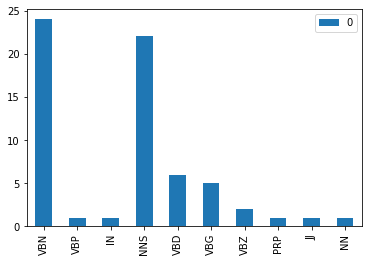

In [310]:
count = Counter(second_col_list_ex15)
df = pandas.DataFrame.from_dict(count, orient='index')
df.plot(kind='bar')

In [218]:
# function to get unique values 
def unique(list1): 
    x = np.array(list1) 
    print(np.unique(x, return_index=True)) 
      
  
# driver code 
list1 = [10, 20, 10, 30, 40, 40] 
print("the unique values from 1st list is") 
unique(list1) 
  
  
list2 =[1, 2, 1, 1, 3, 4, 3, 3, 5] 
print("\nthe unique values from 2nd list is") 
unique(list2) 

the unique values from 1st list is
(array([10, 20, 30, 40]), array([0, 1, 3, 4]))

the unique values from 2nd list is
(array([1, 2, 3, 4, 5]), array([0, 1, 4, 5, 8]))
